In [86]:
import numpy as np
import matplotlib.pyplot as plt
import ripser
import persim
import pandas as pd
from teaspoon.SP.tsa_tools import takens

In [87]:
df = pd.read_csv('csv/BX_GSE_#1.csv')

In [88]:
ts = df['ts'].to_numpy()
dims = df['dim'].to_numpy()
lags = df['lag'].to_numpy()

In [89]:
np.mean(dims), np.mean(lags)

(5.165247871807711, 8.468202303455183)

In [91]:
dim = 5
lag = 8
step = 30
window = 500
vecs = takens(ts, dim, lag)

In [20]:
pd = []

In [21]:
for idx in range(0, vecs.shape[0] - window - 1, step):
    pd.append(ripser.ripser(vecs[idx: idx + window], maxdim=2))
    print(idx)

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380


In [92]:
pd = ripser.ripser(vecs[:500], maxdim=2)

In [73]:
from copy import deepcopy

pdist_H0 = np.zeros((len(pd), len(pd)))
pdist = np.zeros((len(pd), len(pd)))
pdist_H2 = np.zeros((len(pd), len(pd)))
pd_list = deepcopy(pd)

import pickle
with open('bin/tda_pd.pkl', 'wb') as pkl:
    pickle.dump(pd_list, pkl)

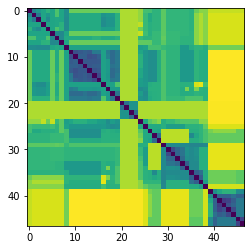

In [75]:
for i in range(len(pd_list)):
    for j in range(i, len(pd_list)):
#         distance_bottleneck_H0 = persim.bottleneck(pd_list[i]['dgms'][0], pd_list[j]['dgms'][0])
        distance_bottleneck = persim.bottleneck(pd_list[i]['dgms'][1], pd_list[j]['dgms'][1])
#         distance_bottleneck_H2 = persim.bottleneck(pd_list[i]['dgms'][2], pd_list[j]['dgms'][2])
        pdist[i, j] = pdist[j, i] = distance_bottleneck


plt.imshow(pdist)

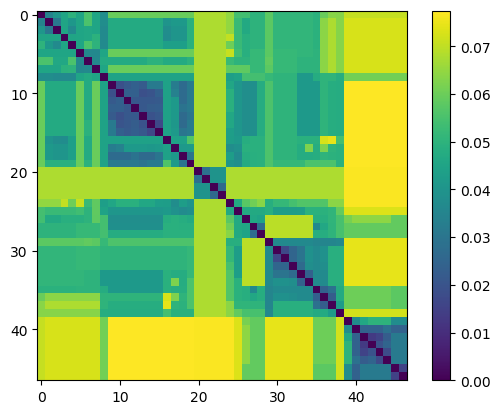

In [84]:
plt.imshow(pdist)
plt.colorbar()

In [77]:
def drawThisDiagram(diagram):
    TextSize = 14
    plt.title('Persistence Diagram', size = TextSize)
    MS = 3
    top = max(diagram[1].T[1])
    plt.plot([0,top*1.25],[0,top*1.25],'k--')
    plt.yticks( size = TextSize)
    plt.xticks(size = TextSize)
    plt.xlabel('Birth', size = TextSize)
    plt.ylabel('Death', size = TextSize)
    plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
    plt.xlim(0,top*1.25)
    plt.ylim(0,top*1.25)

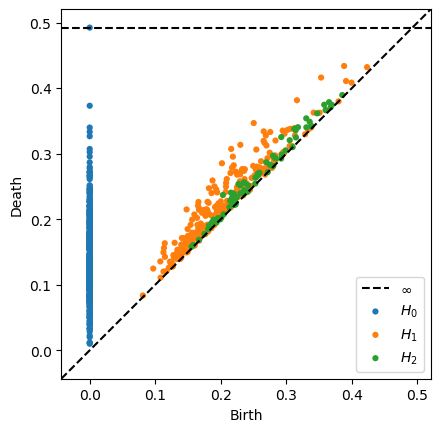

In [82]:
persim.plot_diagrams(pd_list[i]['dgms'])

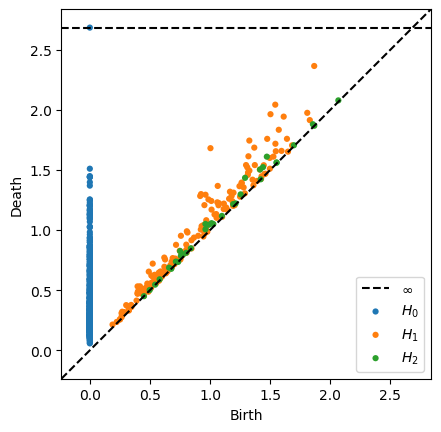

In [93]:
persim.plot_diagrams(pd['dgms'])